In [1]:
import os
os.chdir(os.path.expanduser("~"))

In [2]:
import pandas as pd
import numpy as  np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,  accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot  as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import RidgeClassifier,SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN 
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

%matplotlib inline

In [3]:
# Colaboratoryでは以下を実行して必要なファイルをダウンロード
#!wget https://raw.githubusercontent.com/UTDataMining/2021S/master/project/winequality-white.csv
wine = pd.read_csv('Desktop/report/winequality-white.csv', header=0, na_values='?', sep=";")
wine.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
wine.isnull().any(axis = 0)

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

In [5]:
wine['total acid'] = wine['fixed acidity'] + wine['volatile acidity']

In [6]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,total acid
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909,7.133029
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639,0.847592
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000,4.110000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000,6.570000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000,7.070000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000,7.590000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000,14.470000


* remove outliers

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: tight_layout not applied: number of columns in subplot specifications must be multiples of one another.
  if sys.path[0] == '':


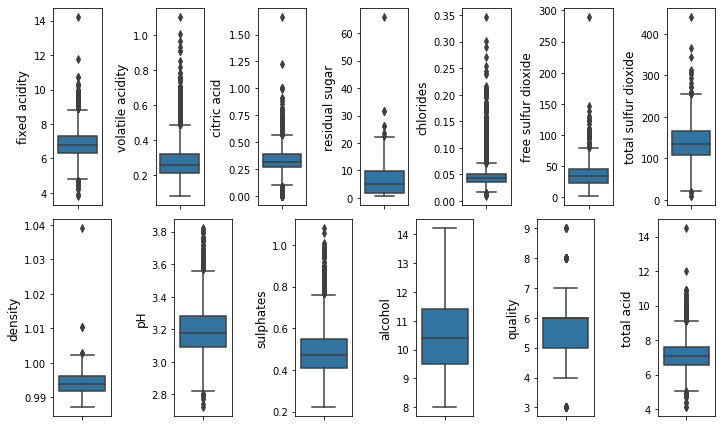

In [7]:
col = wine.columns.tolist()
plt.figure(figsize = (10,6))
for i in range(7):
    plt.subplot(2,7,i+1)
    sns.boxplot(wine[col[i]], orient="v")
    plt.ylabel(col[i],fontsize=12)
plt.tight_layout()
for i in range(6):
    plt.subplot(2,6,i+7)
    sns.boxplot(wine[col[i+7]], orient="v")
    plt.ylabel(col[i+7],fontsize=12)
plt.tight_layout()

In [8]:
wine_1 = wine.drop(labels='quality',axis=1)
for col in wine_1.columns.values:
    med = np.median(wine[col])
    st = np.std(wine[col])
    wine = wine[(wine[col] < med+2*st) & (wine[col] > med-2*st)]

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: tight_layout not applied: number of columns in subplot specifications must be multiples of one another.
  if sys.path[0] == '':


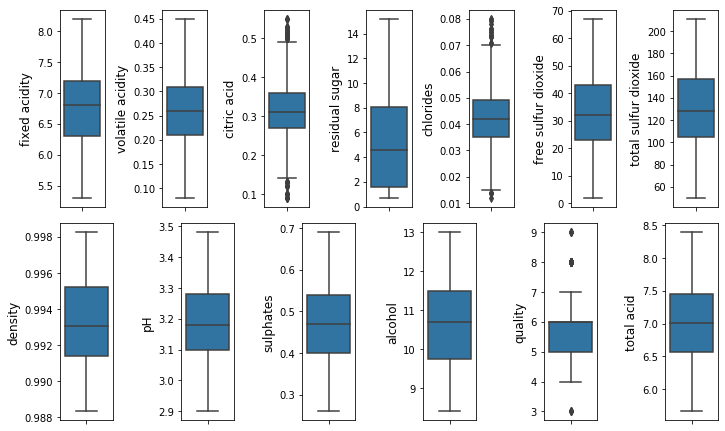

In [9]:
col = wine.columns.tolist()
plt.figure(figsize = (10,6))
for i in range(7):
    plt.subplot(2,7,i+1)
    sns.boxplot(wine[col[i]], orient="v")
    plt.ylabel(col[i],fontsize=12)
plt.tight_layout()
for i in range(6):
    plt.subplot(2,6,i+7)
    sns.boxplot(wine[col[i+7]], orient="v")
    plt.ylabel(col[i+7],fontsize=12)
plt.tight_layout()

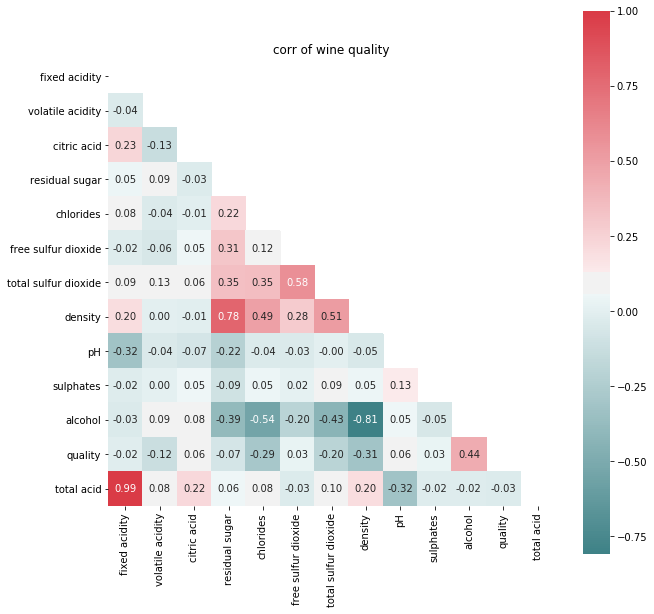

In [10]:
plt.figure(figsize = (10,10))
corr = wine.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(200, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, square=True, annot=True, fmt='0.2f')
plt.title('corr of wine quality')
plt.show()

In [11]:
def np_corr(X,y):   
    corr = []
    for col in X.columns.values:
        corr.append(abs(np.corrcoef(X[col].values,y)[0,1]))
    corr_order = pd.DataFrame({'col':X.columns,'corr_value':corr})
    corr_order = corr_order.sort_values(by='corr_value',ascending=False)
    return corr_order

In [12]:
wine_1 = wine.drop(columns=['quality'], axis=1)
corr = np_corr(wine_1, wine['quality'])
print(corr)

                     col  corr_value
10               alcohol    0.436327
7                density    0.313794
4              chlorides    0.289208
6   total sulfur dioxide    0.200373
1       volatile acidity    0.120485
3         residual sugar    0.072548
8                     pH    0.062344
2            citric acid    0.060314
9              sulphates    0.032922
11            total acid    0.030978
5    free sulfur dioxide    0.028039
0          fixed acidity    0.016775


In [13]:
# 特徴量
#X=wine[ ['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide', 'total sulfur dioxide','pH', 'sulphates','alcohol']].values
X=wine[ ['total acid','fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density', 'pH', 'sulphates','alcohol']].values

# 正解ラベルを1（高品質：ワインのqualityが6以上）か0（低品質：ワインのqualityが6未満）とする
y=wine['quality'].values
y = (y>=6).astype(np.int) 
print(np.sum(y==1, axis=0)) # 高品質ワインデータの数
print(np.sum(y==0, axis=0)) # 低品質ワインデータの数

2032
795


In [14]:
X = StandardScaler().fit_transform(X)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [16]:
lr=LogisticRegression(solver='liblinear',  multi_class='auto') 
lr.fit(X_train, y_train) # 訓練データで学習
y_pred = lr.predict(X_test) # テストデータで予測

print(confusion_matrix(y_test, y_pred)) # 混同行列
print(accuracy_score(y_test, y_pred)) # accuracy
print(precision_score(y_test, y_pred)) # precision
print(recall_score(y_test, y_pred)) # recall
print(f1_score(y_test, y_pred))  # f値

# 特徴量ごとのパラメータ重み
#pd.DataFrame(lr.coef_, index=['weight'], columns=wine.drop("quality", axis=1).columns.values)

[[ 74  85]
 [ 29 378]]
0.7985865724381626
0.816414686825054
0.9287469287469288
0.8689655172413794


In [108]:
models = {'KNN                       ':KNN(),
          'SVC                       ':SVC(probability=True),
          'DecisionTreeClassifier    ':DecisionTreeClassifier(),
          'LogisticRegression        ':LogisticRegression(),
          'RidgeClassifier           ':RidgeClassifier(),
          'SGDClassifier             ':SGDClassifier(), 
          'GradientBoostingClassifier':GradientBoostingClassifier(),
          'MLPClassifier             ':MLPClassifier(),
          'RandomForestClassifier    ':RandomForestClassifier()}
#models['Ensemble'] = VotingClassifier(estimators=list(models.items()), voting='soft')

In [109]:
score = {}
for key,model in models.items():
    model.fit(X_train, y_train) # 訓練データで学習
    y_pred = model.predict(X_test) # テストデータで予測
    score[key] = 'accracy: {:.4f}, pre: {:.4f}, recall: {:.4f}, f1:{:.4f}  '.format(
                         accuracy_score(y_test, y_pred),
                         precision_score(y_test, y_pred,average='weighted'),
                         recall_score(y_test, y_pred,average='weighted'),
                         f1_score(y_test, y_pred,average='weighted'))
print(score)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


{'KNN                       ': 'accracy: 0.7827, pre: 0.7771, recall: 0.7827, f1:0.7793  ', 'SVC                       ': 'accracy: 0.8251, pre: 0.8186, recall: 0.8251, f1:0.8163  ', 'DecisionTreeClassifier    ': 'accracy: 0.8021, pre: 0.8071, recall: 0.8021, f1:0.8042  ', 'LogisticRegression        ': 'accracy: 0.7915, pre: 0.7805, recall: 0.7915, f1:0.7752  ', 'RidgeClassifier           ': 'accracy: 0.7951, pre: 0.7853, recall: 0.7951, f1:0.7775  ', 'SGDClassifier             ': 'accracy: 0.7792, pre: 0.7662, recall: 0.7792, f1:0.7667  ', 'GradientBoostingClassifier': 'accracy: 0.8092, pre: 0.8007, recall: 0.8092, f1:0.7994  ', 'MLPClassifier             ': 'accracy: 0.8163, pre: 0.8086, recall: 0.8163, f1:0.8073  ', 'RandomForestClassifier    ': 'accracy: 0.8640, pre: 0.8606, recall: 0.8640, f1:0.8602  '}


In [113]:
param_range = [0.001,0.01,0.1,1.0,10.0,100.0,1000.0]
param_grid = [{"C":param_range,"kernel":["linear","rbf"]}]
gs = GridSearchCV(estimator = SVC(),          
                  param_grid = param_grid,
                  scoring = 'accuracy',
                  cv = 10) 
gs = gs.fit(X_train,y_train)
print(gs.best_score_)
print(gs.best_params_)

0.810254960820241
{'C': 10.0, 'kernel': 'rbf'}


In [ ]:
param_range = [1.0,5.0,10.0,20.0,30.0,50.0,100.0]
param_grid = [{"C":param_range,"kernel":["rbf"]}]
gs = GridSearchCV(estimator = SVC(),          
                  param_grid = param_grid,
                  scoring = 'accuracy',
                  cv = 10) 
gs = gs.fit(X_train,y_train)
print(gs.best_score_)
print(gs.best_params_)

In [ ]:
param_grid = [{"n_estimators":range(1,300,10)}]
gs = GridSearchCV(estimator = RandomForestClassifier(random_state=10),          
                  param_grid = param_grid,
                  scoring = 'accuracy',
                  cv = 10) 
gs = gs.fit(X_train,y_train)
print(gs.best_score_)
print(gs.best_params_)

In [111]:
models = {'SVC                       ':SVC(C=10.0, kernel='rbf', probability=True),
          #'DecisionTreeClassifier    ':DecisionTreeClassifier(), 
          #'GradientBoostingClassifier':GradientBoostingClassifier(),
          'RandomForestClassifier    ':RandomForestClassifier(n_estimators=151, random_state=10)}
models['Ensemble'] = VotingClassifier(estimators=list(models.items()), voting='soft')

In [112]:
score = {}
for key,model in models.items():
    model.fit(X_train, y_train) 
    y_pred = model.predict(X_test)
    score[key] = 'accracy: {:.4f}, pre: {:.4f}, recall: {:.4f}, f1:{:.4f}  '.format(
                         accuracy_score(y_test, y_pred),
                         precision_score(y_test, y_pred,average='weighted'),
                         recall_score(y_test, y_pred,average='weighted'),
                         f1_score(y_test, y_pred,average='weighted'))
print(score)

{'SVC                       ': 'accracy: 0.8357, pre: 0.8312, recall: 0.8357, f1:0.8323  ', 'RandomForestClassifier    ': 'accracy: 0.8728, pre: 0.8700, recall: 0.8728, f1:0.8691  ', 'Ensemble': 'accracy: 0.8498, pre: 0.8455, recall: 0.8498, f1:0.8445  '}


In [196]:
dimension = [i for i in range(2,13)]
accuracy = []

Text(0, 0.5, 'accuracy')

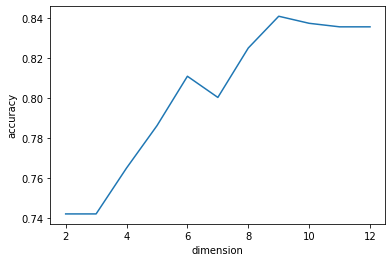

In [197]:
for i in dimension:
    pca = PCA(n_components=i).fit(X_train)
    X_train_pca = pca.transform(X_train)
    X_test_pca = pca.transform(X_test)
    model = SVC(C=10.0, kernel='rbf', probability=True)
    model.fit(X_train_pca, y_train)
    y_pred = model.predict(X_test_pca)
    accuracy.append(accuracy_score(y_test, y_pred))
plt.plot(dimension, accuracy)
plt.xlabel('dimension')
plt.ylabel('accuracy')

In [125]:
dimension = [i for i in range(2,13)]
accuracy = []

Text(0, 0.5, 'accuracy')

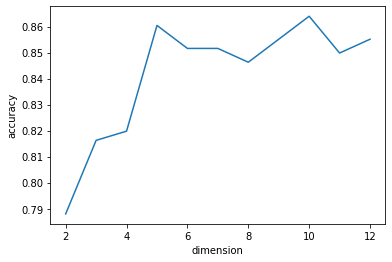

In [126]:
for i in dimension:
    pca = PCA(n_components=i).fit(X_train)
    X_train_pca = pca.transform(X_train)
    X_test_pca = pca.transform(X_test)
    model = RandomForestClassifier(n_estimators=151, random_state=10)
    model.fit(X_train_pca, y_train)
    y_pred = model.predict(X_test_pca)
    accuracy.append(accuracy_score(y_test, y_pred))
plt.plot(dimension, accuracy)
plt.xlabel('dimension')
plt.ylabel('accuracy')

In [120]:
pca = PCA(n_components=10).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
model = RandomForestClassifier(n_estimators=151, random_state=10)
model.fit(X_train_pca, y_train)
y_pred = model.predict(X_test_pca)
print(confusion_matrix(y_test, y_pred)) # 混同行列
print(accuracy_score(y_test, y_pred)) # accuracy
print(precision_score(y_test, y_pred,average='weighted')) # precision
print(recall_score(y_test, y_pred,average='weighted')) # recall
print(f1_score(y_test, y_pred,average='weighted'))  # f値

[[ 99  60]
 [ 17 390]]
0.8639575971731449
0.8629533731367531
0.8639575971731449
0.8567345205355194


In [17]:
model = RandomForestClassifier(n_estimators=151, random_state=10)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred)) # 混同行列
print(accuracy_score(y_test, y_pred)) # accuracy
print(precision_score(y_test, y_pred,average='weighted')) # precision
print(recall_score(y_test, y_pred,average='weighted')) # recall
print(f1_score(y_test, y_pred,average='weighted'))  # f値

[[100  59]
 [ 28 379]]
0.8462897526501767
0.8416864824854381
0.8462897526501767
0.8408078652233014
